# PMR3404 - Controle I
# Experiência 3: Técnicas no domínio da frequência

# Identificação

**Aluno : Felipe Gomes de Melo**

**Turma de Laboratório:** 103

**Professor:** Oswaldo Horikawa


**OBS: Você deve submeter o seu relatório num único arquivo compactado contendo o seu arquivo formato jupyter notebook .ipynb e o diretório contendo todas as figuras do seu relatório.**

# 1. Regime permanente senoidal

Dado um sistema representado por $H(s)$, sabemos que o regime permanente senoidal pode ser calculado fazendo $s=j\omega$, ou seja, $H(j\omega)$.

Para uma eventual entrada $u(t)=X\sin(\omega t)$ a saída $y(t)$ pode ser calculada da seguinte forma:
$$
y(t)= Y\sin(\omega t + \Phi)
$$
onde $Y=|H(j\omega)|X$ e $\Phi=\angle H(j\omega)$

Seja o seguinte Filtro Ativo de 1a. ordem ilustrado na figura a seguir.

<img src="./Figuras/FiltroAtivo.png" width="70%" height="70%"/>

Seria perfeitamente possível realizar o levantamento experimental da resposta em frequência injetando um sinal senoidal na entrada do circuito e verificar o módulo e a fase do sinal senoidal na saída do circuito. 
Realizando esse procedimento para várias frequências angulares $\omega$ é possível traçar os gráficos aproximados de módulo e fase.

Sabemos no entanto que a função de transferência equivalente do circuito é dada por:
$$
H(j\omega)= \frac{A_{CL}}{j\omega T+1},
$$
onde o ganho é dado por $A_{CL}=R_2/R_1$ e a constante de tempo $T=R_2C$.

a-) Calcule as expressões analíticas de módulo e fase em função da frequência angular $\omega$:
$$
|H(j\omega)| = \frac{A_{CL}}{\sqrt{1+\omega^2T^2}}
$$
$$
\angle H(j\omega) = tan^{-1}(-\omega T)
$$

b-) Considerando os seguintes valores para os componentes:
- $R_1=330\Omega$
- $R_2=3.3K\Omega$
- $C=10nF$

Calcule as expressões de módulo e fase em função da frequência angular $\omega$ agora com valores numéricos:
$$
|G(j\omega)| = \frac{10}{\sqrt{1+1.089^{-18} \omega^2}}
$$
$$
\angle G(j\omega) = tan^{-1}(-3.3*10^{-5}\omega)
$$

c-) Podemos agora calcular o diagrama de Bode através dessas expressões e utilizando um gráfico semi-logaritmico.
    Utilizando o script abaixo insira as expressões desenvolvidas para o módulo e fase nas linhas adequadas.

<img src="./Figuras/graph_1.png" width="40%"/>
<!-- <img src="./Figuras/graph_1.png" width="40%"/> -->


In [1]:
R1 = 330
R2 = 3.3e3
C = 10e-9

Acl = R2/R1
T = R2*C

print(f"Acl: {Acl} T: {T} T²: {T**2}")

Acl: 10.0 T: 3.3e-05 T²: 1.089e-09


Text(0, 0.5, 'Phase (deg)')

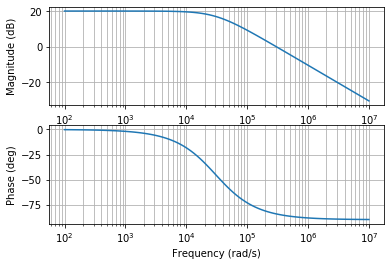

In [2]:
%matplotlib inline
import numpy as np
import control.matlab as co
import matplotlib.pyplot as plt
# Parametros do circuito
R1= 330
R2= 3.3*10**3
C= 10*10**(-9)
K = R2/R1           # ganho
T = R2*C            # cte de tempo
# Geracao da escala da frequencia angular rad/s
omega = np.logspace(2,7,num=100,base=10)
# insira aqui sua formula para o modulo
mag = K/np.sqrt(1+T**2*np.power(omega, 2))
# Conversao para dB
magdB = 20*np.log10(mag)
# insira aqui a sua formula para a fase
phase = np.arctan(-T*omega)
# Conversao de rad para grau
phase_deg = phase*180.0/np.pi
# Geracao de vetor de freq angular rad/s
f, (ax1,ax2) = plt.subplots(2,1)
ax1.semilogx(omega,magdB)
ax1.grid(which="both")
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax2.semilogx(omega,phase_deg)
ax2.grid(which="both")
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Phase (deg)')

# 2. Geração de diagramas de Bode

Seja um sistema dinâmico descrito pela seguinte função de transferência:
$$
G(s) = \frac{(s+3)}{[(s+2)(s^2+2s+25)]}
$$

O esboço manual do diagrama de Bode $G(s)$ é usualmente realizado separando a função de transferência em fatores básicos:
1. Ganho: $K$
2. Fator integral: $1/s$
3. Fator derivativo: $s$
4. Fator de 1a. ordem - pólo: $1/(1+sT)$
5. Fator de 1a. ordem - zero: $(1+sT)$
6. Fator de segunda ordem - pólos:
$$
\frac{1}{\left[ 1+2\zeta\left(\frac{s}{\omega_n}\right) + \left( \frac{s}{\omega_n} \right)^2 \right]}
$$
7. Fator de segunda ordem - zeros:
$$
\left[ 1+2\zeta\left(\frac{s}{\omega_n}\right) + \left( \frac{s}{\omega_n} \right)^2 \right]
$$

a-) Para a função de transferência $G(s)$ dada acima calcule os fatores básicos segundo os ítens 1-7 descritos acima:

- Ganho: 
$$G_1(s)=\frac{3}{25} = 0.12$$

- Zero:
$$G_2(s)=\frac{s}{3}+1$$

- Pólo:
$$G_3(s)=\frac{1}{\frac{s}{2}+1}$$

- 2a. ordem:
$$G_4(s)=\frac{1}{\frac{s^2}{25}+\frac{2s}{25}+1}$$

b-) Calcule o diagrama de Bode dos fatores $G_1$, $G_2$, $G_3$, $G_4$. Utilize o script abaixo.

<img src="./Figuras/bode.png" width="70%"/>

c-) Sabemos que os gráfico do módulo em dB e os gráficos da fase podem ser somados. **Essa seria estratégia
para o esboço manual**. Utilizando o 2o. script abaixo. Verifique se o resultado está correto utilizando o 3o. script abaixo.

<img src="./Figuras/bode2.png" width="70%"/>


In [3]:
import sympy as sp

s = sp.Symbol('s')

G = (s+3)/((s+2)*(s**2 + 2*s + 25))
sp.apart(G)
#G

-(s - 25)/(25*(s**2 + 2*s + 25)) + 1/(25*(s + 2))

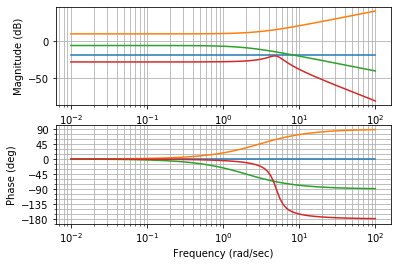

In [4]:
%matplotlib inline
import numpy as np
import control.matlab as co
import matplotlib.pyplot as plt
plt.figure(1)
omega = np.logspace(-2,2,num=100,base=10)
s=co.tf('s')
G0 = co.tf([0.12], [1])
# Obs: mag0, mag1, etc. nao estao em dB, embora o grafico esteja
# Todas os diagramas de Bode a seguir sao colocados na mesma figura
[mag0,phi0,w]=co.bode(G0,omega,dB=True,Hz=False,deg=True)
G1 = s+3
[mag1,phi1,w]=co.bode(G1,omega,dB=True,Hz=False,deg=True)
G2 = 1/(s+2)
[mag2,phi2,w]=co.bode(G2,omega,dB=True,Hz=False,deg=True)
G3 = 1/(s**2+2*s+25)
[mag3,phi3,w]=co.bode(G3,omega,dB=True,Hz=False,deg=True)

Text(0, 0.5, 'Phase (deg)')

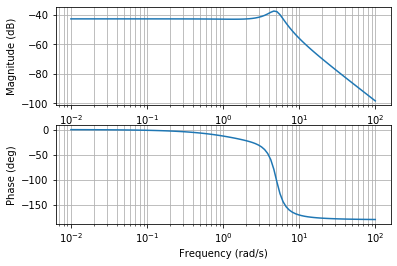

In [5]:
# Continuacao do script acima
# Diagrama de Bode utilizando o conceito de soma
# dos fatores basicos
# Conversao para dB
%matplotlib inline
mag0dB = 20*np.log10(mag0)
mag1dB = 20*np.log10(mag1)
mag2dB = 20*np.log10(mag2)
mag3dB = 20*np.log10(mag3)
# Somatorio dos modulos em dB
magt = mag0dB+mag1dB+mag2dB+mag3dB
# Somatoria das fases e conversao para grau
phit = 180*(phi0+phi1+phi2+phi3)/np.pi
f, (ax1,ax2) = plt.subplots(2,1)
ax1.semilogx(omega,magt)
ax1.grid(which="both")
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax2.semilogx(omega,phit)
ax2.grid(which="both")
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Phase (deg)')

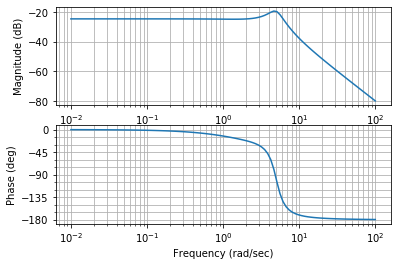

In [6]:
%matplotlib inline
# Verificacao do Diagrama de Bode de G(s)
# Verifica se o resultado acima e' coerente
s=co.tf('s')
G=(s+3)/((s+2)*(s**2+2*s+25))
[modulo,fase,w]=co.bode(G,omega,dB=True,Hz=False,deg=True)

# 3. Margens de estabilidade no diagrama de Bode

Na Experiência 1 foi definido o sistema de controle de posição da antena parabólica.

<img src="./Figuras/diagblocoPosicaoDashed.png" width="70%" height="70%"/>

A planta pode ser escrita como:
$$
\frac{\Theta_o(s)}{V_p(s)}=G_\theta(s)=\frac{K_1 K_m K_g}{s(s+a)(s+a_m)}
$$

Os parâmetros do sistema estão definidos na Tabela abaixo:

| Parâmetro | Valor |
|:--|:--|
|$K_{pot}$ | 0.318 |
|$K_{tac}$ | 0.48 |
|$K_1$     | 100 |
|$a$       | 100 |
|$K_m$     | 2.083 |
|$a_m$     | 1.71 |
|$K_g$     | 0.1 |
        
Para o sistema de de controle de posição o controlador é escrito através da seguinte forma geral:
$$
H_\theta(s)=K_{pot}H_1(s).
$$

No ítem 6 da Experiência 2 foi utilizado um controlador PD com filtro:
$$
H_1(s) = K_p \left( 1 + T_d\frac{s}{\frac{T_d}{N}s+1} \right)
$$

Foi proposto o projeto de um sistema de controle que atendesse as seguintes especificações:
- Erro estático nulo para uma entrada degrau unitário $\theta_{e_{ss}}=0$,
- Tempo de subida $t_r < 1.0s$,
- Tempo de assentamento $t_s < 5s$,
- Máximo sobresinal $M_p < 10\%$.

Utilizando $N=100$ e $T_d=0.5$ foi proposto o projeto de um ganho proporcional do controlador
$K_p$ utilizando lugar das raízes.

Esse sistema se torna instável somente para uma faixa de valores muito elevada da constante proporcional $K_p$ como será verificado abaixo.
As margens de estabilidade são muito elevadas no entanto sabemos que a faixa valores de $K_p$ que atendem às especificações de controle e que também são fisicamente plausíveis é bem mais reduzida quando comparada a faixa de valores que garantem estabilidade.

Aqui vamos utilizar a ferramenta sisotool do pacote de sistemas de controle da linguagem Python para analisar as margens de estabilidade do sistema (Obs: Essa ferramenta é similar ao do Matlab).
Para cada valor de $K_p$ solicitado no ítem b-) você deve posicionar os pólos na ferramenta sisotool e verificar as margens de estabilidade para aquele ponto.
**Não é necessário ser muito preciso em relação ao valor de $K_p$ já que a ferramenta sisotool é em geral muito lenta. Para o valor de $K_p$ que conseguir altere o valor na tabela abaixo**

a-) Utilizando o método de Routh-Hurwitz estime o intervalo dos valores do ganho proporcional $K_p$ tal que o sistema seja estável.

$$
0 < K_p < 8932
$$

b-) Indique o valor do ganho proporcional para um sistema marginalmente estável:

$$
K_p^{marg} = 8931
$$

b-) Utilizando a ferramenta sisotool vamos analisar como as margens de estabilidade variam com o valor do
    ganho proporcional $K_p$.
    
-$K_p=70$:

<img src="./Figuras/Sisotool-70.png" width="90%"/>

-$K_p=500$:

<img src="./Figuras/Sisotool-455.png" width="90%"/>

-$K_p=2000$:

<img src="./Figuras/Sisotool-2000.png" width="90%"/>

-$K_p=8900$:

<img src="./Figuras/Sisotool-8900.png" width="90%"/>

-$K_p=8950$:

<img src="./Figuras/Sisotool-8944.png" width="90%"/>


- Preencha a tabela abaixo:

|$K_p$|$G_m$|$\omega_g$ |$PM$|$\omega_p$|
|:-|:-|:-|:-|:-|
|70| 39 dB | 22.46 Hz | 83.54 deg | 0.55 Hz |
|500| 25.8 dB | 22.46 Hz | 76.12 deg | 2.4 Hz |
|2000| 12.7 dB | 22.46 Hz | 43.81 deg | 9.15 Hz |
|8900| 0 dB | 22.46 Hz | 0.01 deg | 22.46 Hz |
|8950| -0.01 dB | 22.46 Hz | -0.04 deg | 22.48 Hz |

c-) Qual o efeito do aumento do ganho proporcional $K_p$ sobre o gráfico do ganho $|GH_p(j\omega)|$ ?

O aumento do ganho puxa o eixo Y para baixo, de modo a aumentar os valores da curva

d-) Qual o efeito do aumento do ganho proporcional $K_p$ sobre o gráfico da fase $\angle GH_p(j\omega)$ ?

O gráfico da fase não é alterado com a variação do ganho


Using matplotlib backend: Qt5Agg
-------------
FT da planta Gp(s) = 

         20.83
-----------------------
s^3 + 101.7 s^2 + 171 s

-------------
FT DE MALHA ABERTA GHp(s)=Gp(s)*Hp(s) = 

                334.5 s + 662.4
------------------------------------------------
0.5 s^4 + 150.9 s^3 + 1.026e+04 s^2 + 1.71e+04 s

-------------
POLOS E ZEROS DE MALHA ABERTA
Polos de GHp(s) =  [-200.   -100.     -1.71    0.  ]
Zeros de GHp(s) =  [-1.98019802]


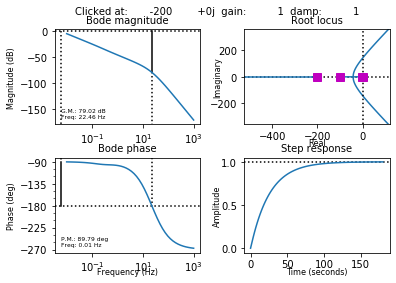

In [8]:
# qt - abre uma janela fora do Browser
%matplotlib qt
# Python packages
import numpy as np
import control.matlab as co
import matplotlib.pyplot as plt
#
# Controle da posicao angular do motor eletrico CC
# Controle de Posicao Angular com controlador PID
#
# Definicao dos valores dos parametros do sistema
# Constante do potenciometro
Kpot = 0.318;
# Parametros da funcao de transferencia Gp(s)
K1 = 100;
Km = 2.083;
Kg = 0.1;
a  = 100;
am = 1.71;
# Funcao de transferencia da posicao angular do sistema Gp(s)
# Definicao de s como funcao de transferencia
s = co.tf('s');
Gp = (K1*Km*Kg)/(s*(s+a)*(s+am))
print('-------------')
print('FT da planta Gp(s) = ')
print(Gp)
# Inicialmente Kp=1 para LR
Kp = 1
Td = 0.5
N  = 100
# Controlador PD com filtro
H1 = Kp*(1+Td*s/(Td*s/N+1))
# Controlador Hp(s)
Hp = Kpot*H1
# Malha aberta
GHp=Gp*Hp
print('-------------')
print('FT DE MALHA ABERTA GHp(s)=Gp(s)*Hp(s) = ')
print(GHp)
print('-------------')
print('POLOS E ZEROS DE MALHA ABERTA')
print('Polos de GHp(s) = ', co.pole(GHp))
print('Zeros de GHp(s) = ', co.zero(GHp))
co.sisotool(GHp)

# 4. Critério de estabilidade de Nyquist

<img src="./Figuras/StandardBlock.png" width="60%" height="60%"/>

**O critério de estabilidade de Nyquist permite inferir a condição de estabilidade de malha fechada a partir de informações da malha aberta.**

Em última instância deseja-se saber qual o número de pólos de malha fechada no semi-plano direito (SPD).
A estabilidade requer que o número de pólos de malha fechada no semi-plano direito seja nulo.

O critério pode se resumido da seguinte forma. 
Sabemos que:
$$
Z=N+P,
$$
onde:
- $P$ é o número de pólos de $G(s)H(s)$ no SPD,
- $N$ é número de enlaçamentos do ponto $-1$ no sentido horário se $N>0$, e anti-horário se $N<0$,
- $Z$ é o número de zeros de $1+G(s)H(s)$ (**Obs: esse zeros são obviamente os pólos de malha fechada**).

Para estabilidade devemos então ter sempre $Z=0$:
- Se $P>0$ então devemos ter $N=-P$,
- Se $P=0$ então devemos ter $N=0$.

Seja um sistema de controle em malha fechada onde a malha aberta é definida pela seguinte função de transferência:
$$
G(s)H(s)=\frac{K}{s(s+1)^2}
$$

a-) Utilizando o critério de estabilidade de Routh-Hurwitz calcule o valor de $K$ para um sistema marginalmente estável.

$$
K_p^{marg} = 2
$$

b-) Utilizando o critério de estabilidade de Nyquist calcule a condição de estabilidade do sistema para os seguintes valores da constante $K$

1) $K=1$:

Utilize o script abaixo para plotar o gráfico de Nyquist e estime o valor de $N$:

<img src="./Figuras/k_1.png" width="60%"/>

- Qual a sua conclusão sobre a condição de estabilidade ?

Observando o gráfico, podemos ver que o loop da curva se forma a direita do ponto -1, de modo que $N=0$. Como $GH$ não possui polos $SPD$, temos que $P=0$.

Logo $Z=N+P=0+0=0$, portanto o sistema é estável


2) $K=2$:

Utilize o script abaixo para plotar o gráfico de Nyquist e estime o valor de $N$:

<img src="./Figuras/k_2.png" width="60%"/>

- Qual a sua conclusão sobre a condição de estabilidade ?

Observando o gráfico, podemos ver que o loop da curva se forma exatamente no ponto -1, de modo que -1 está contido na curva. A presença de -1 na curva caracteriza um ganho de estabilidade marginal

Como $Z=0$, o sistema é estável

3) $K=3$:

Utilize o script abaixo para plotar o gráfico de Nyquist e estime o valor de $N$:

<img src="./Figuras/k_3.png" width="60%"/>

- Qual a sua conclusão sobre a condição de estabilidade ?

Podemos perceber que a função envolve o ponto -1 uma vez, de modo que $N=1$

Como $P=1$, teremos que $Z=P+N=1$, logo o sistema é instável




In [12]:
#%matplotlib inline
%matplotlib qt      
import numpy as np
import control.matlab as co
import matplotlib.pyplot as plt
omega = np.logspace(-1,1,num=100,base=10)
s=co.tf('s')
K=2
GH=K/(s*(s+1)**2)
[a,b,omega]=co.nyquist(GH,omega)